# Get Input Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns


trainingLink = "https://raw.githubusercontent.com/LuisM78/Occupancy-detection-data/master/datatraining.txt"
dataTest1Link = "https://raw.githubusercontent.com/LuisM78/Occupancy-detection-data/master/datatest.txt"
dataTest2Link = "https://raw.githubusercontent.com/LuisM78/Occupancy-detection-data/master/datatest2.txt"

# ---- Variables: ----
# tr = training set
# ts1 = test set 1
# ts2 = test set 2
# trainX = training set input values
# trainy = training set target values
# test1X = test set 1 input values
# test1y = test set 1 target values
# test2X = test set 2 input values
# test2y = test set 2 target values


# getting training set
tr = pd.read_csv(trainingLink, sep=",", skiprows=1, header=None)
tr.columns = ["Id","date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"]
tr = tr.drop(columns=['Id'])
# convert date string to datetime
tr['date'] =  pd.to_datetime(tr['date'], format='%Y-%m-%d %H:%M:%S')
# split day and time and drop date column
dates, times = zip(*[(d.date(), d.time()) for d in tr['date']])
tr.insert(0, 'Day', dates)
tr.insert(1, 'Time', times)
tr = tr.drop(columns=['date'])
# splitting training set
target = tr[tr.columns[-1:]]
target.columns = ["Occupancy"]
trainX = tr[tr.columns[:-1]]
trainy = target


# getting test set 1
ts1 = pd.read_csv(dataTest1Link, sep=",", skiprows=1, header=None)
ts1.columns = ["Id","date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"]
ts1 = ts1.drop(columns=['Id'])
# convert date string to datetime
ts1['date'] =  pd.to_datetime(ts1['date'], format='%Y-%m-%d %H:%M:%S')
# split day and time and drop date column
dates, times = zip(*[(d.date(), d.time()) for d in ts1['date']])
ts1.insert(0, 'Day', dates)
ts1.insert(1, 'Time', times)
ts1 = ts1.drop(columns=['date'])
# splitting training set
target = ts1[ts1.columns[-1:]]
target.columns = ["Occupancy"]
test1X = ts1[ts1.columns[:-1]]
test1y = target


# getting test set 2
ts2 = pd.read_csv(dataTest2Link, sep=",", skiprows=1, header=None)
ts2.columns = ["Id","date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"]
ts2 = ts2.drop(columns=['Id'])
# convert date string to datetime
ts2['date'] =  pd.to_datetime(ts2['date'], format='%Y-%m-%d %H:%M:%S')
# split day and time and drop date column
dates, times = zip(*[(d.date(), d.time()) for d in ts2['date']])
ts2.insert(0, 'Day', dates)
ts2.insert(1, 'Time', times)
ts2 = ts2.drop(columns=['date'])
# splitting training set
target = ts2[ts2.columns[-1:]]
target.columns = ["Occupancy"]
test2X = ts2[ts2.columns[:-1]]
test2y = target

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
x = trainX.copy()
x = x.drop(columns=['Day', 'Time'])

scaler = RobustScaler()
#scaler = MinMaxScaler() 
scaledX = scaler.fit_transform(x)
print(x)
print(scaledX)

      Temperature  Humidity  Light         CO2  HumidityRatio
0           23.18   27.2720  426.0  721.250000       0.004793
1           23.15   27.2675  429.5  714.000000       0.004783
2           23.15   27.2450  426.0  713.500000       0.004779
3           23.15   27.2000  426.0  708.250000       0.004772
4           23.10   27.2000  426.0  704.500000       0.004757
...           ...       ...    ...         ...            ...
8138        21.05   36.0975  433.0  787.250000       0.005579
8139        21.05   35.9950  433.0  789.500000       0.005563
8140        21.10   36.0950  433.0  798.500000       0.005596
8141        21.10   36.2600  433.0  820.333333       0.005621
8142        21.10   36.2000  447.0  821.000000       0.005612

[8143 rows x 5 columns]
[[1.65088757 0.10156452 1.66162847 1.33986656 0.77903789]
 [1.63313609 0.10112903 1.67528035 1.30358632 0.77154191]
 [1.63313609 0.09895161 1.66162847 1.30108424 0.76841904]
 ...
 [0.42011834 0.95540323 1.68893223 1.7264387  1.4092

# Install and import neeeded packages

In [ ]:
import sys
!{sys.executable} -m pip install apyori
!{sys.executable} -m pip install pyfim

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=1629b34cf2d2a4ff9188a390b3c480a28ad4d09da1462f1ff6acbebb24a8c845
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori
     |████████████████████████████████| 358kB 2.8MB/s 
  Created wheel for pyfim: filename=pyfim-6.28-cp36-cp36m-linux_x86_64.whl size=536896 sha256=7cb88781aec0eacaf70cd1523f3f54ad4355dd658a406576e8a93ae5a6c28ca4
  Stored in directory: /root/.cache/pip/wheels/19/ac/b4/9ae8ceb2208d78b21b1157f8561cc4469d236b7d785e7422f1
Successfully built pyfim


In [ ]:
from apyori import apriori, load_transactions
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import subprocess
from collections import defaultdict
from scipy.stats.stats import pearsonr

import fim
from fim import apriori


In [ ]:
help(fim.apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

#Discretizzazione

In [ ]:
# Determino num bins con la regola di Sturges
import math

n_bins = math.ceil(1 + ((10/3)*math.log10(8143)))
print(n_bins)

15


In [ ]:
discr_tr = tr.copy()
discr_tr = discr_tr.drop(columns=['Day', 'Time'])

In [ ]:
#discretizzo in 15 bins e rinomino

#indici
index = range(8143)
discr_tr = discr_tr.assign(indexes = index)

# Temperature
T = pd.cut(discr_tr['Temperature'], 15, labels = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15'])
discr_tr['T'] = T
discr_tr = discr_tr.drop(labels = 'Temperature', axis = 1)

# Humidity
H = pd.cut(discr_tr['Humidity'], 15, labels = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15'])
discr_tr['H'] = H
discr_tr = discr_tr.drop(labels = 'Humidity', axis = 1)

# HumidityRatio
HR = pd.cut(discr_tr['HumidityRatio'], 15, labels = ['HR1', 'HR2', 'HR3', 'HR4', 'HR5', 'HR6', 'HR7', 'HR8', 'HR9', 'HR10', 'HR11', 'HR12', 'HR13', 'HR14', 'HR15'])
discr_tr['HR'] = HR
discr_tr = discr_tr.drop(labels = 'HumidityRatio', axis = 1)

# Light
L = pd.cut(discr_tr['Light'], 15, labels = ['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'L11', 'L12', 'L13', 'L14', 'L15'])
discr_tr['L'] = L
discr_tr = discr_tr.drop(labels = 'Light', axis = 1)

# CO2
C = pd.cut(discr_tr['CO2'], 15, labels = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15'])
discr_tr['C'] = C
discr_tr = discr_tr.drop(labels = 'CO2', axis = 1)

# Occupancy
OC = pd.cut(discr_tr['Occupancy'], 2, labels = ['OC0', 'OC1'])
discr_tr['OC'] = OC
discr_tr = discr_tr.drop(labels = 'Occupancy', axis = 1)

In [ ]:
for c in discr_tr:
  if(c!="indexes"):
    print(c)
    s = 0
    for n in discr_tr[c].unique():
      l = len(discr_tr[discr_tr[c]==n])
      print("Elementi nella categoria %s: %d" %(n, l))
      s += l
    print("Sum: ",  s)
    print()

T
Elementi nella categoria T15: 106
Elementi nella categoria T14: 115
Elementi nella categoria T13: 229
Elementi nella categoria T12: 593
Elementi nella categoria T11: 334
Elementi nella categoria T10: 375
Elementi nella categoria T9: 539
Elementi nella categoria T8: 599
Elementi nella categoria T7: 597
Elementi nella categoria T6: 583
Elementi nella categoria T5: 1160
Elementi nella categoria T4: 615
Elementi nella categoria T3: 633
Elementi nella categoria T2: 1369
Elementi nella categoria T1: 296
Sum:  8143

H
Elementi nella categoria H8: 732
Elementi nella categoria H7: 1377
Elementi nella categoria H6: 488
Elementi nella categoria H5: 319
Elementi nella categoria H4: 360
Elementi nella categoria H3: 742
Elementi nella categoria H2: 1522
Elementi nella categoria H1: 288
Elementi nella categoria H9: 199
Elementi nella categoria H10: 684
Elementi nella categoria H11: 739
Elementi nella categoria H12: 307
Elementi nella categoria H13: 133
Elementi nella categoria H14: 105
Elementi nel

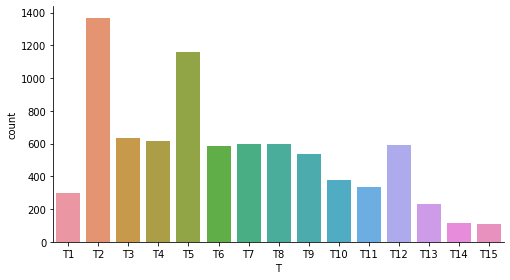

In [ ]:
import seaborn as sns
sns.catplot(x="T", kind="count", data=discr_tr, height=4, aspect=7/4)

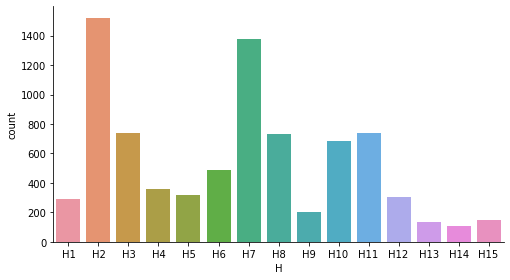

In [ ]:
sns.catplot(x="H", kind="count", data=discr_tr, height=4, aspect=7/4)

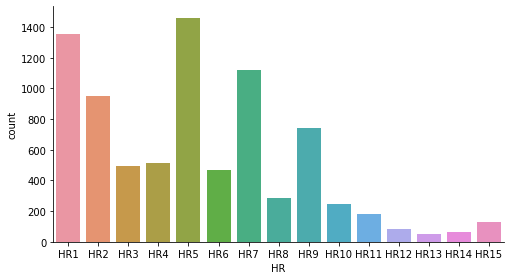

In [ ]:
sns.catplot(x="HR", kind="count", data=discr_tr, height=4, aspect=7/4)

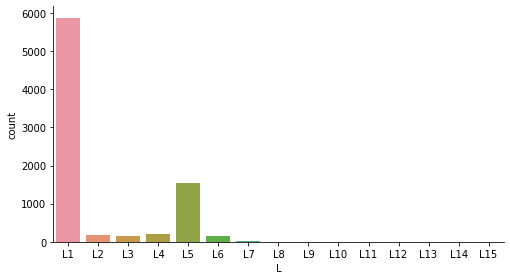

In [ ]:
sns.catplot(x="L", kind="count", data=discr_tr, height=4, aspect=7/4)

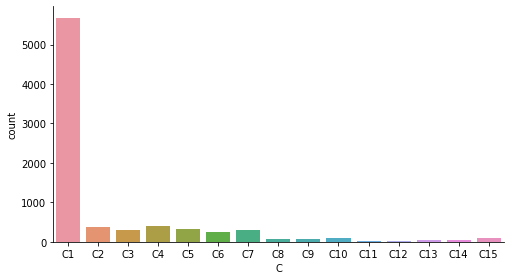

In [ ]:
sns.catplot(x="C", kind="count", data=discr_tr, height=4, aspect=7/4)

In [ ]:
#transform dataframe into a transaction like dictionary: index -> list of items
baskets = defaultdict(list)

for i in range(len(discr_tr)):
    row = discr_tr[discr_tr['indexes'] == i]
    item = row['T']
    baskets[i].append(item[i])
    item = row['H']
    baskets[i].append(item[i])
    item = row['HR']
    baskets[i].append(item[i])
    item = row['L']
    baskets[i].append(item[i])
    item = row['C']
    baskets[i].append(item[i])
    item = row['OC']
    baskets[i].append(item[i])

In [ ]:
#get the list of items from the transactions
baskets_lists = [b for b in baskets.values()]

# Frequent itemset mining


In [ ]:
min_sup = []
types = []
itemsets_num = []

## Support 2%


In [ ]:
# support 2%

itemsets = apriori(baskets_lists, supp=2, zmin=2, report='as')
print(len(itemsets))
itemsets

min_sup.append(0.02)
types.append("frequent")
itemsets_num.append(len(itemsets))

553


In [ ]:
itemsets = apriori(baskets_lists, zmin=2, supp=2, target='m', report='as')
print(len(itemsets))
itemsets
min_sup.append(0.02)
types.append("maximal")
itemsets_num.append(len(itemsets))

41


In [ ]:
# Type --> closed

itemsets = apriori(baskets_lists, supp=2, zmin=2, target='c', report='as')
print(len(itemsets))
itemsets

min_sup.append(0.02)
types.append("closed")
itemsets_num.append(len(itemsets))

239


## Support 3%

In [ ]:
# Type --> frequent

itemsets = apriori(baskets_lists, supp=3, zmin=2, report='as')
print(len(itemsets))
itemsets

min_sup.append(0.03)
types.append("frequent")
itemsets_num.append(len(itemsets))

446


In [ ]:
# Type --> maximal

itemsets = apriori(baskets_lists, supp=3, zmin=2, target='m', report='as')
print(len(itemsets))
itemsets

min_sup.append(0.03)
types.append("maximal")
itemsets_num.append(len(itemsets))

31


In [ ]:
# Type --> closed

itemsets = apriori(baskets_lists, supp=3, zmin=2, target='c', report='as')
print(len(itemsets))
itemsets

min_sup.append(0.03)
types.append("closed")
itemsets_num.append(len(itemsets))

171


## Support 4%

In [ ]:
# Type --> frequent

itemsets = apriori(baskets_lists, supp=4, zmin=2, report='as')
print(len(itemsets))
itemsets

min_sup.append(0.04)
types.append("frequent")
itemsets_num.append(len(itemsets))

329


In [ ]:
# Type --> maximal

itemsets = apriori(baskets_lists, supp=4, zmin=2, target = 'm', report='as')
print(len(itemsets))
itemsets

min_sup.append(0.04)
types.append("maximal")
itemsets_num.append(len(itemsets))

17


In [ ]:
# Type --> closed

itemsets = apriori(baskets_lists, supp=4, zmin=2, target='c', report='as')
print(len(itemsets))
itemsets

min_sup.append(0.04)
types.append("closed")
itemsets_num.append(len(itemsets))

127


## Support 5%

In [ ]:
# Type --> frequent

itemsets = apriori(baskets_lists, supp=5, zmin=2, report='as')
print(len(itemsets))
itemsets

min_sup.append(0.05)
types.append("frequent")
itemsets_num.append(len(itemsets))

217


In [ ]:
# Type --> maximal

itemsets = apriori(baskets_lists, supp=5, zmin=2, target='m', report='as')
print(len(itemsets))
itemsets

min_sup.append(0.05)
types.append("maximal")
itemsets_num.append(len(itemsets))

16


In [ ]:
# Type --> closed

itemsets = apriori(baskets_lists, supp=5, zmin=2, target='c', report='as')
print(len(itemsets))
itemsets
min_sup.append(0.05)
types.append("closed")
itemsets_num.append(len(itemsets))

104


In [ ]:
all_rules = apriori(baskets_lists, supp=5, conf=70, zmin=2, target='r', report='ascl')
rules = []
conf_list = []
lift_list = []

for r in all_rules:
  conf_list.append(r[4])
  lift_list.append(r[5])
  if(r[0]=='OC0' or r[0]=='OC1'):
    rules.append(r)


print(len(all_rules))
#rules

492


Text(0, 0.5, 'Occurrences')

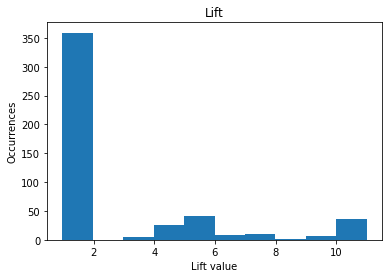

In [ ]:
plt.hist(lift_list, bins='sturges')
plt.title("Lift")
plt.xlabel("Lift value")
plt.ylabel("Occurrences")

Text(0, 0.5, 'Occurrences')

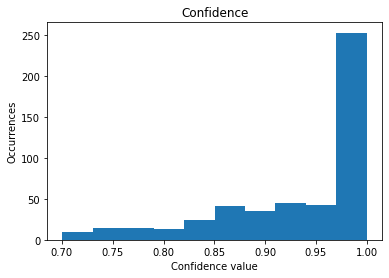

In [ ]:
plt.hist(conf_list, bins='sturges')
plt.title("Confidence")
plt.xlabel("Confidence value")
plt.ylabel("Occurrences")

In [ ]:
all_rules = apriori(baskets_lists, supp=5, conf=80, zmin=2, target='r', report='ascl')
rules = []

rules = []
conf_list = []
lift_list = []

for r in all_rules:
  conf_list.append(r[4])
  lift_list.append(r[5])
  if(r[0]=='OC0' or r[0]=='OC1'):
    rules.append(r)


print(len(all_rules))
#rules

450


Text(0, 0.5, 'Occurrences')

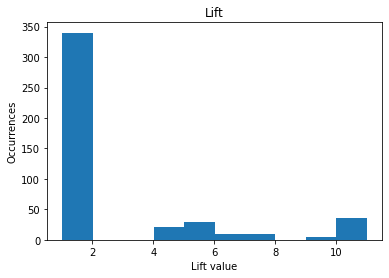

In [ ]:
plt.hist(lift_list, bins='sturges')
plt.title("Lift")
plt.xlabel("Lift value")
plt.ylabel("Occurrences")

Text(0, 0.5, 'Occurrences')

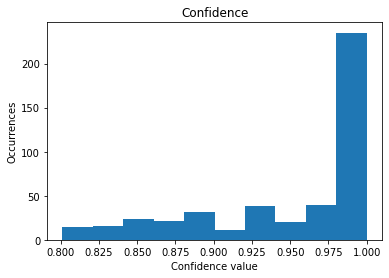

In [ ]:
plt.hist(conf_list, bins='sturges')
plt.title("Confidence")
plt.xlabel("Confidence value")
plt.ylabel("Occurrences")

In [ ]:
all_rules = apriori(baskets_lists, supp=5, conf=85, zmin=2, target='r', report='ascl')
rules = []

rules = []
conf_list = []
lift_list = []

for r in all_rules:
  conf_list.append(r[4])
  lift_list.append(r[5])
  if(r[0]=='OC0' or r[0]=='OC1'):
    rules.append(r)


print(len(all_rules))
#rules

416


Text(0, 0.5, 'Occurrences')

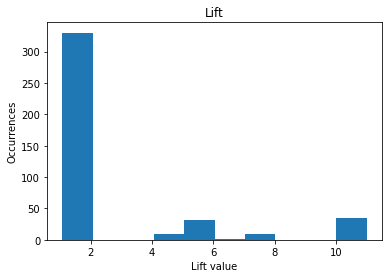

In [ ]:
plt.hist(lift_list, bins='sturges')
plt.title("Lift")
plt.xlabel("Lift value")
plt.ylabel("Occurrences")

Text(0, 0.5, 'Occurrences')

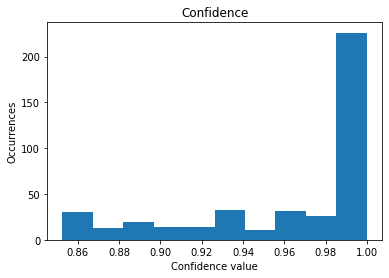

In [ ]:
plt.hist(conf_list, bins='sturges')
plt.title("Confidence")
plt.xlabel("Confidence value")
plt.ylabel("Occurrences")

In [ ]:
all_rules = apriori(baskets_lists, supp=5, conf=90, zmin=2, target='r', report='ascl')
rules = []

rules = []
conf_list = []
lift_list = []

for r in all_rules:
  conf_list.append(r[4])
  lift_list.append(r[5])
  if(r[0]=='OC0' or r[0]=='OC1'):
    rules.append(r)


print(len(all_rules))
#rules

348


Text(0, 0.5, 'Occurrences')

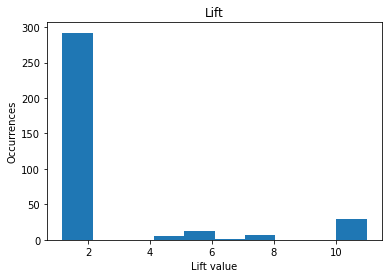

In [ ]:
plt.hist(lift_list, bins='sturges')
plt.title("Lift")
plt.xlabel("Lift value")
plt.ylabel("Occurrences")

Text(0, 0.5, 'Occurrences')

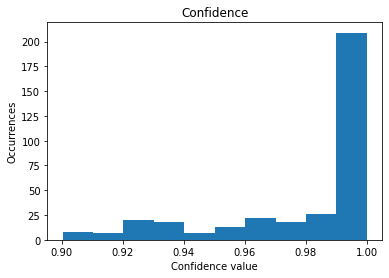

In [ ]:
plt.hist(conf_list, bins='sturges')
plt.title("Confidence")
plt.xlabel("Confidence value")
plt.ylabel("Occurrences")

In [ ]:
all_rules = apriori(baskets_lists, supp=5, conf=95, zmin=2, target='r', report='ascl')
rules = []

rules = []
conf_list = []
lift_list = []

for r in all_rules:
  conf_list.append(r[4])
  lift_list.append(r[5])
  if(r[0]=='OC0' or r[0]=='OC1'):
    rules.append(r)


print(len(all_rules))
#rules

288


Text(0, 0.5, 'Occurrences')

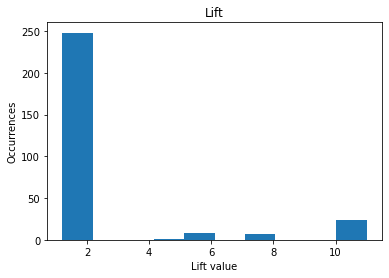

In [ ]:
plt.hist(lift_list, bins='sturges')
plt.title("Lift")
plt.xlabel("Lift value")
plt.ylabel("Occurrences")

Text(0, 0.5, 'Occurrences')

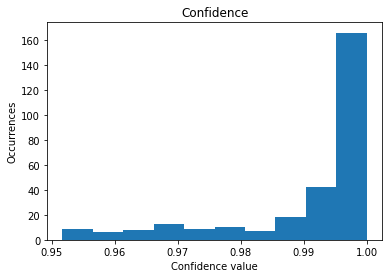

In [ ]:
plt.hist(conf_list, bins='sturges')
plt.title("Confidence")
plt.xlabel("Confidence value")
plt.ylabel("Occurrences")

## Support 6%

In [ ]:
# Type --> frequent

itemsets = apriori(baskets_lists, supp=6, zmin=2, report='as')
print(len(itemsets))
itemsets

min_sup.append(0.06)
types.append("frequent")
itemsets_num.append(len(itemsets))

158


In [ ]:
# Type --> maximal

itemsets = apriori(baskets_lists, supp=6, zmin=2, target='m', report='as')
print(len(itemsets))
itemsets
min_sup.append(0.06)
types.append("maximal")
itemsets_num.append(len(itemsets))

14


In [ ]:
# Type --> closed

itemsets = apriori(baskets_lists, supp=6, zmin=2, target='c', report='as')
print(len(itemsets))
itemsets

min_sup.append(0.06)
types.append("closed")
itemsets_num.append(len(itemsets))

83


In [ ]:
all_rules = apriori(baskets_lists, supp=5, conf=70, zmin=2, target='r', report='ascl')
rules = []
conf_list = []
lift_list = []

for r in all_rules:
  conf_list.append(r[4])
  lift_list.append(r[5])
  if(r[0]=='OC0' or r[0]=='OC1'):
    rules.append(r)


print(len(all_rules))
#rules

492


Text(0, 0.5, 'Occurrences')

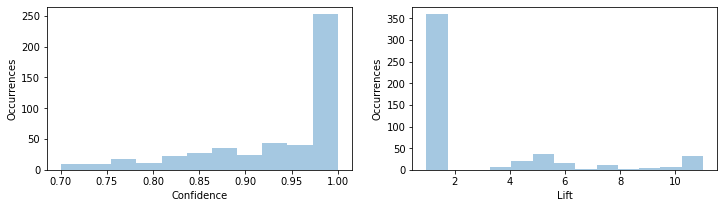

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(12, 3))
ax1 = sns.distplot(conf_list, kde=False, ax=axes[0])
ax1.set_xlabel("Confidence")
ax1.set_ylabel("Occurrences")

ax2 = sns.distplot(lift_list, kde=False, ax=axes[1])
ax2.set_xlabel("Lift")
ax2.set_ylabel("Occurrences")

In [ ]:
all_rules = apriori(baskets_lists, supp=5, conf=75, zmin=2, target='r', report='ascl')
rules = []
conf_list = []
lift_list = []

for r in all_rules:
  conf_list.append(r[4])
  lift_list.append(r[5])
  if(r[0]=='OC0' or r[0]=='OC1'):
    rules.append(r)


print(len(all_rules))
#rules

475


Text(0, 0.5, 'Occurrences')

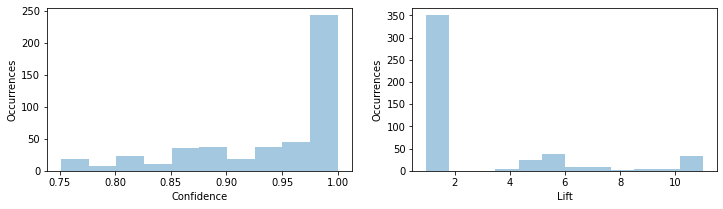

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(12, 3))
ax1 = sns.distplot(conf_list, kde=False, ax=axes[0])
ax1.set_xlabel("Confidence")
ax1.set_ylabel("Occurrences")

ax2 = sns.distplot(lift_list, kde=False, ax=axes[1])
ax2.set_xlabel("Lift")
ax2.set_ylabel("Occurrences")

In [ ]:
all_rules = apriori(baskets_lists, supp=5, conf=80, zmin=2, target='r', report='ascl')
rules = []
conf_list = []
lift_list = []

for r in all_rules:
  conf_list.append(r[4])
  lift_list.append(r[5])
  if(r[0]=='OC0' or r[0]=='OC1'):
    rules.append(r)


print(len(all_rules))
#rules

450


Text(0, 0.5, 'Occurrences')

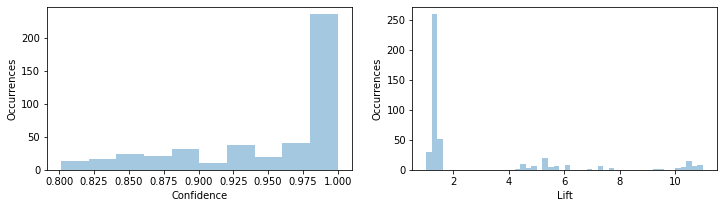

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(12, 3))
ax1 = sns.distplot(conf_list, kde=False, ax=axes[0])
ax1.set_xlabel("Confidence")
ax1.set_ylabel("Occurrences")

ax2 = sns.distplot(lift_list, kde=False, ax=axes[1])
ax2.set_xlabel("Lift")
ax2.set_ylabel("Occurrences")

In [ ]:
all_rules = apriori(baskets_lists, supp=5, conf=85, zmin=2, target='r', report='ascl')
rules = []
conf_list = []
lift_list = []

for r in all_rules:
  conf_list.append(r[4])
  lift_list.append(r[5])
  if(r[0]=='OC0' or r[0]=='OC1'):
    rules.append(r)


print(len(all_rules))
#rules

416


Text(0, 0.5, 'Occurrences')

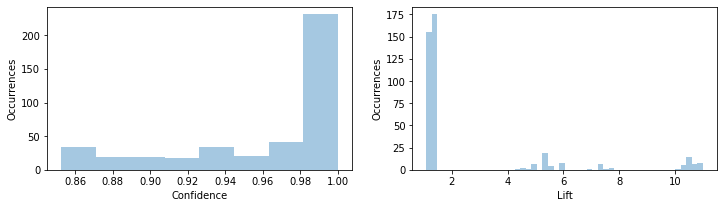

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(12, 3))
ax1 = sns.distplot(conf_list, kde=False, ax=axes[0])
ax1.set_xlabel("Confidence")
ax1.set_ylabel("Occurrences")

ax2 = sns.distplot(lift_list, kde=False, ax=axes[1])
ax2.set_xlabel("Lift")
ax2.set_ylabel("Occurrences")

In [ ]:
all_rules = apriori(baskets_lists, supp=5, conf=90, zmin=2, target='r', report='ascl')
rules = []
conf_list = []
lift_list = []

for r in all_rules:
  conf_list.append(r[4])
  lift_list.append(r[5])
  if(r[0]=='OC0' or r[0]=='OC1'):
    rules.append(r)


print(len(all_rules))
#rules

348


Text(0, 0.5, 'Occurrences')

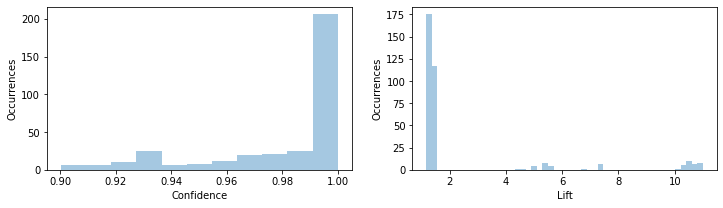

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(12, 3))
ax1 = sns.distplot(conf_list, kde=False, ax=axes[0])
ax1.set_xlabel("Confidence")
ax1.set_ylabel("Occurrences")

ax2 = sns.distplot(lift_list, kde=False, ax=axes[1])
ax2.set_xlabel("Lift")
ax2.set_ylabel("Occurrences")

In [ ]:
all_rules = apriori(baskets_lists, supp=5, conf=95, zmin=2, target='r', report='ascl')
rules = []
conf_list = []
lift_list = []

for r in all_rules:
  conf_list.append(r[4])
  lift_list.append(r[5])
  if(r[0]=='OC0' or r[0]=='OC1'):
    rules.append(r)


print(len(all_rules))
#rules

288


Text(0, 0.5, 'Occurrences')

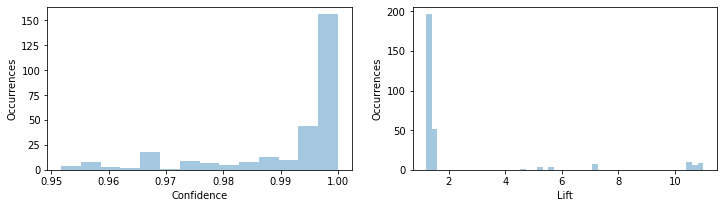

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(12, 3))
ax1 = sns.distplot(conf_list, kde=False, ax=axes[0])
ax1.set_xlabel("Confidence")
ax1.set_ylabel("Occurrences")

ax2 = sns.distplot(lift_list, kde=False, ax=axes[1])
ax2.set_xlabel("Lift")
ax2.set_ylabel("Occurrences")

In [ ]:
from operator import itemgetter
all_rules.sort(key=itemgetter(5), reverse=True)
print(len(all_rules))
all_rules[:20]

288


[('HR9',
  ('H11', 'T5', 'C1', 'L1', 'OC0'),
  448,
  0.0550165786565148,
  1.0,
  11.004054054054054),
 ('HR9',
  ('H11', 'T5', 'C1', 'L1'),
  448,
  0.0550165786565148,
  1.0,
  11.004054054054054),
 ('HR9',
  ('H11', 'T5', 'C1', 'OC0'),
  448,
  0.0550165786565148,
  1.0,
  11.004054054054054),
 ('HR9',
  ('H11', 'T5', 'C1'),
  448,
  0.0550165786565148,
  1.0,
  11.004054054054054),
 ('HR9',
  ('H11', 'T5', 'L1', 'OC0'),
  483,
  0.059314748864055016,
  1.0,
  11.004054054054054),
 ('HR9',
  ('H11', 'T5', 'L1'),
  483,
  0.059314748864055016,
  1.0,
  11.004054054054054),
 ('HR9',
  ('H11', 'T5', 'OC0'),
  483,
  0.059314748864055016,
  1.0,
  11.004054054054054),
 ('HR9', ('H11', 'T5'), 483, 0.059314748864055016, 1.0, 11.004054054054054),
 ('H11',
  ('HR9', 'T5', 'L1', 'OC0'),
  483,
  0.059314748864055016,
  0.9679358717434869,
  10.665631669292576),
 ('H11',
  ('HR9', 'T5', 'L1'),
  483,
  0.059314748864055016,
  0.9679358717434869,
  10.665631669292576),
 ('H11',
  ('HR9', 'C1'

In [ ]:
from operator import itemgetter
rules.sort(key=itemgetter(5), reverse=True)
print(len(rules))
rules

104


[('OC1',
  ('L5',),
  1495,
  0.1835932702935036,
  0.9676375404530745,
  4.557242621115897),
 ('OC0', ('T6', 'L1'), 502, 0.06164804126243399, 1.0, 1.269566573121297),
 ('OC0', ('T8', 'L1'), 462, 0.05673584673953089, 1.0, 1.269566573121297),
 ('OC0', ('T4', 'C1', 'L1'), 586, 0.07196364976053052, 1.0, 1.269566573121297),
 ('OC0', ('T4', 'C1'), 601, 0.07380572270661918, 1.0, 1.269566573121297),
 ('OC0', ('T4', 'L1'), 586, 0.07196364976053052, 1.0, 1.269566573121297),
 ('OC0', ('T3', 'C1', 'L1'), 611, 0.07503377133734496, 1.0, 1.269566573121297),
 ('OC0', ('T3', 'L1'), 611, 0.07503377133734496, 1.0, 1.269566573121297),
 ('OC0',
  ('H10', 'HR7', 'C1', 'L1'),
  625,
  0.07675303942036105,
  1.0,
  1.269566573121297),
 ('OC0',
  ('H10', 'HR7', 'C1'),
  641,
  0.07871791722952229,
  1.0,
  1.269566573121297),
 ('OC0',
  ('H10', 'HR7', 'L1'),
  625,
  0.07675303942036105,
  1.0,
  1.269566573121297),
 ('OC0',
  ('H10', 'C1', 'L1'),
  625,
  0.07675303942036105,
  1.0,
  1.269566573121297),
 ('

## Support 7%

In [ ]:
# Type --> frequent

itemsets = apriori(baskets_lists, supp=7, zmin=2, report='as')
print(len(itemsets))
itemsets

min_sup.append(0.07)
types.append("frequent")
itemsets_num.append(len(itemsets))

125


In [ ]:
# Type --> maximal

itemsets = apriori(baskets_lists, supp=7, zmin=2, target='m', report='as')
print(len(itemsets))
itemsets

min_sup.append(0.07)
types.append("maximal")
itemsets_num.append(len(itemsets))

12


In [ ]:
# Type --> closed

itemsets = apriori(baskets_lists, supp=7, zmin=2, target='c', report='as')
print(len(itemsets))
itemsets

min_sup.append(0.07)
types.append("closed")
itemsets_num.append(len(itemsets))

67


## Support 8%

In [ ]:
# Type --> frequent

itemsets = apriori(baskets_lists, supp=8, zmin=2, report='as')
print(len(itemsets))
itemsets

min_sup.append(0.08)
types.append("frequent")
itemsets_num.append(len(itemsets))

75


In [ ]:
# Type --> maximal

itemsets = apriori(baskets_lists, supp=8, zmin=2, target='m', report='as')
print(len(itemsets))
itemsets

min_sup.append(0.08)
types.append("maximal")
itemsets_num.append(len(itemsets))

8


In [ ]:
# Type --> closed

itemsets = apriori(baskets_lists, supp=8, zmin=2, target='c', report='as')
print(len(itemsets))
itemsets

min_sup.append(0.08)
types.append("closed")
itemsets_num.append(len(itemsets))

48


## Support 9%

In [ ]:
# Type --> frequent

itemsets = apriori(baskets_lists, supp=9, zmin=2, report='as')
print(len(itemsets))
itemsets

min_sup.append(0.09)
types.append("frequent")
itemsets_num.append(len(itemsets))

73


In [ ]:
# Type --> maximal

itemsets = apriori(baskets_lists, supp=9, zmin=2, target='m', report='as')
print(len(itemsets))
itemsets

min_sup.append(0.09)
types.append("maximal")
itemsets_num.append(len(itemsets))

7


In [ ]:
# Type --> closed

itemsets = apriori(baskets_lists, supp=9, zmin=2, target='c', report='as')
print(len(itemsets))
itemsets

min_sup.append(0.09)
types.append("closed")
itemsets_num.append(len(itemsets))

47


## Support 10%

In [ ]:
# Type --> frequent

itemsets = apriori(baskets_lists, supp=10, zmin=2, report='as')
print(len(itemsets))
itemsets

min_sup.append(0.10)
types.append("frequent")
itemsets_num.append(len(itemsets))

65


In [ ]:
# Type --> maximal

itemsets = apriori(baskets_lists, supp=10, zmin=2, target='m', report='as')
print(len(itemsets))
itemsets

min_sup.append(0.10)
types.append("maximal")
itemsets_num.append(len(itemsets))

7


In [ ]:
# Type --> closed

itemsets = apriori(baskets_lists, supp=10, zmin=2, target='c', report='as')
print(len(itemsets))
itemsets

min_sup.append(0.10)
types.append("closed")
itemsets_num.append(len(itemsets))

43


In [ ]:
table = pd.DataFrame({'min_sup': min_sup,
                   'tipo': types,
                   'numero itemsets': itemsets_num})

print(table.to_latex(index=False))

\begin{tabular}{rlr}
\toprule
 min\_sup &      tipo &  numero itemsets \\
\midrule
    0.02 &  frequent &              553 \\
    0.02 &   maximal &               41 \\
    0.02 &    closed &              239 \\
    0.03 &  frequent &              446 \\
    0.03 &   maximal &               31 \\
    0.03 &    closed &              171 \\
    0.04 &  frequent &              329 \\
    0.04 &   maximal &               17 \\
    0.04 &    closed &              127 \\
    0.05 &  frequent &              217 \\
    0.05 &   maximal &               16 \\
    0.05 &    closed &              104 \\
    0.06 &  frequent &              158 \\
    0.06 &   maximal &               14 \\
    0.06 &    closed &               83 \\
    0.07 &  frequent &              125 \\
    0.07 &   maximal &               12 \\
    0.07 &    closed &               67 \\
    0.08 &  frequent &               75 \\
    0.08 &   maximal &                8 \\
    0.08 &    closed &               48 \\
    0.09 &  fr

In [ ]:
# Type --> maximal

itemsets = apriori(baskets_lists, supp=15, zmin=2, target='m', report='as')
print(len(itemsets))
itemsets

5


[(('HR1', 'H2', 'C1', 'OC0'), 1242, 0.15252363993614146),
 (('T2', 'C1', 'L1', 'OC0'), 1350, 0.16578656514797985),
 (('HR5', 'C1', 'L1', 'OC0'), 1358, 0.16676900405256048),
 (('H2', 'C1', 'L1', 'OC0'), 1297, 0.15927790740513326),
 (('L5', 'OC1'), 1495, 0.1835932702935036)]

In [ ]:
all_rules = apriori(baskets_lists, supp=10, conf=70, zmin=2, target='r', report='ascl')
rules = []

rules = []
conf_list = []
lift_list = []

for r in all_rules:
  conf_list.append(r[4])
  lift_list.append(r[5])
  if(r[0]=='OC0' or r[0]=='OC1'):
    rules.append(r)


print(len(all_rules))
#rules

136


Text(0, 0.5, 'Occurrences')

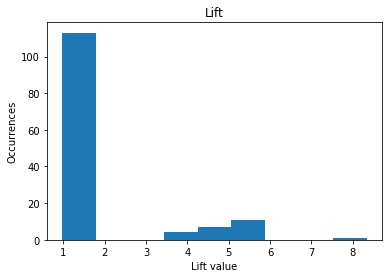

In [ ]:
plt.hist(lift_list, bins='sturges')
plt.title("Lift")
plt.xlabel("Lift value")
plt.ylabel("Occurrences")

Text(0, 0.5, 'Occurrences')

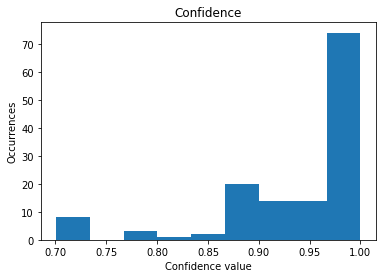

In [ ]:
plt.hist(conf_list, bins='sturges')
plt.title("Confidence")
plt.xlabel("Confidence value")
plt.ylabel("Occurrences")

In [ ]:
all_rules = apriori(baskets_lists, supp=10, conf=80, zmin=2, target='r', report='ascl')
rules = []

rules = []
conf_list = []
lift_list = []

for r in all_rules:
  conf_list.append(r[4])
  lift_list.append(r[5])
  if(r[0]=='OC0' or r[0]=='OC1'):
    rules.append(r)


print(len(all_rules))
#rules

125


Text(0, 0.5, 'Occurrences')

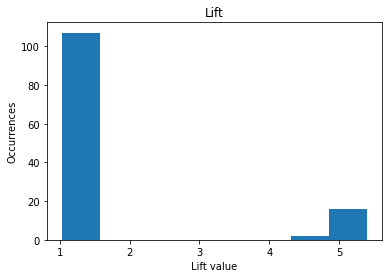

In [ ]:
plt.hist(lift_list, bins='sturges')
plt.title("Lift")
plt.xlabel("Lift value")
plt.ylabel("Occurrences")

Text(0, 0.5, 'Occurrences')

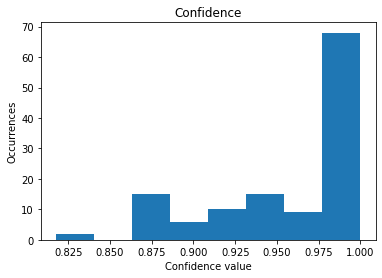

In [ ]:
plt.hist(conf_list, bins='sturges')
plt.title("Confidence")
plt.xlabel("Confidence value")
plt.ylabel("Occurrences")

In [ ]:
all_rules = apriori(baskets_lists, supp=10, conf=85, zmin=2, target='r', report='ascl')
rules = []

rules = []
conf_list = []
lift_list = []

for r in all_rules:
  conf_list.append(r[4])
  lift_list.append(r[5])
  if(r[0]=='OC0' or r[0]=='OC1'):
    rules.append(r)


print(len(all_rules))
#rules

123


Text(0, 0.5, 'Occurrences')

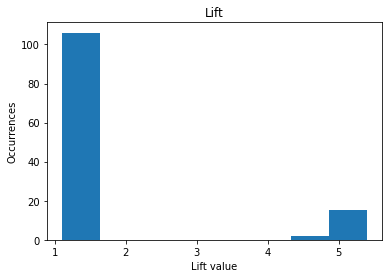

In [ ]:
plt.hist(lift_list, bins='sturges')
plt.title("Lift")
plt.xlabel("Lift value")
plt.ylabel("Occurrences")

Text(0, 0.5, 'Occurrences')

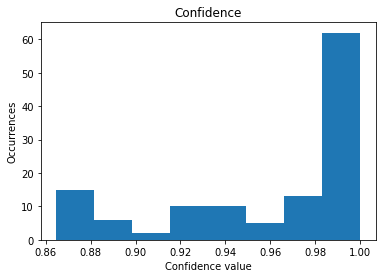

In [ ]:
plt.hist(conf_list, bins='sturges')
plt.title("Confidence")
plt.xlabel("Confidence value")
plt.ylabel("Occurrences")

In [ ]:
all_rules = apriori(baskets_lists, supp=10, conf=90, zmin=2, target='r', report='ascl')
rules = []

rules = []
conf_list = []
lift_list = []

for r in all_rules:
  conf_list.append(r[4])
  lift_list.append(r[5])
  if(r[0]=='OC0' or r[0]=='OC1'):
    rules.append(r)


print(len(all_rules))
#rules

102


Text(0, 0.5, 'Occurrences')

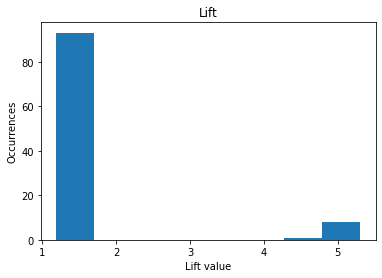

In [ ]:
plt.hist(lift_list, bins='sturges')
plt.title("Lift")
plt.xlabel("Lift value")
plt.ylabel("Occurrences")

Text(0, 0.5, 'Occurrences')

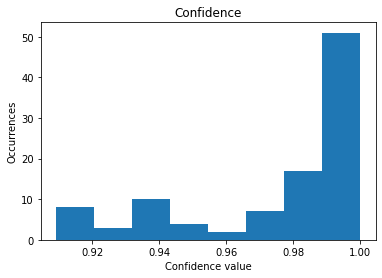

In [ ]:
plt.hist(conf_list, bins='sturges')
plt.title("Confidence")
plt.xlabel("Confidence value")
plt.ylabel("Occurrences")

In [ ]:
all_rules = apriori(baskets_lists, supp=10, conf=95, zmin=2, target='r', report='ascl')

rules = []
conf_list = []
lift_list = []

for r in all_rules:
  conf_list.append(r[4])
  lift_list.append(r[5])
  if(r[0]=='OC0' or r[0]=='OC1'):
    rules.append(r)


print(len(all_rules))
all_rules

80


[('OC0',
  ('T5', 'C1', 'L1'),
  1051,
  0.12906791108927915,
  1.0,
  1.269566573121297),
 ('L1',
  ('T5', 'C1', 'OC0'),
  1051,
  0.12906791108927915,
  0.9677716390423573,
  1.339548607295923),
 ('C1',
  ('T5', 'L1', 'OC0'),
  1051,
  0.12906791108927915,
  0.9677716390423573,
  1.3864469487547353),
 ('L1',
  ('T5', 'C1'),
  1051,
  0.12906791108927915,
  0.9519927536231884,
  1.31770814087262),
 ('C1',
  ('T5', 'L1'),
  1051,
  0.12906791108927915,
  0.9677716390423573,
  1.3864469487547353),
 ('OC0',
  ('T5', 'C1'),
  1086,
  0.13336608129681934,
  0.9836956521739131,
  1.2488671181247544),
 ('C1',
  ('T5', 'OC0'),
  1086,
  0.13336608129681934,
  0.9687778768956289,
  1.3878885030895682),
 ('C1',
  ('T5',),
  1104,
  0.13557656883212577,
  0.9517241379310345,
  1.3634570118178069),
 ('OC0', ('T5', 'L1'), 1086, 0.13336608129681934, 1.0, 1.269566573121297),
 ('L1',
  ('T5', 'OC0'),
  1086,
  0.13336608129681934,
  0.9687778768956289,
  1.3409413992114747),
 ('OC0',
  ('T5',),
  112

Text(0, 0.5, 'Occurrences')

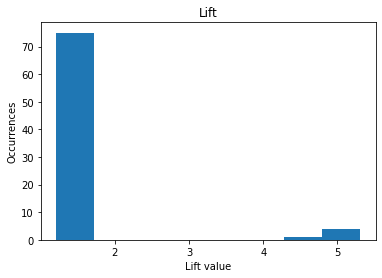

In [ ]:
plt.hist(lift_list, bins='sturges')
plt.title("Lift")
plt.xlabel("Lift value")
plt.ylabel("Occurrences")

Text(0, 0.5, 'Occurrences')

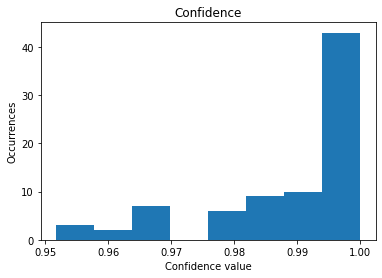

In [ ]:
plt.hist(conf_list, bins='sturges')
plt.title("Confidence")
plt.xlabel("Confidence value")
plt.ylabel("Occurrences")

In [ ]:
conf_list

[1.0,
 0.9677716390423573,
 0.9677716390423573,
 0.9519927536231884,
 0.9677716390423573,
 0.9836956521739131,
 0.9687778768956289,
 0.9517241379310345,
 1.0,
 0.9687778768956289,
 0.9663793103448276,
 1.0,
 0.9939914163090129,
 0.9922879177377892,
 0.9939914163090129,
 0.9922879177377892,
 0.9857142857142858,
 0.9943955164131305,
 0.9929078014184397,
 1.0,
 0.9923339011925043,
 0.9923339011925043,
 0.9842395587076438,
 1.0,
 0.9940374787052811,
 0.9940374787052811,
 0.9866171003717472,
 0.9947526236881559,
 0.9933530280649926,
 1.0,
 0.9852289512555391,
 1.0,
 0.9976580796252927,
 1.0,
 0.9941656942823804,
 1.0,
 0.9964994165694282,
 1.0,
 1.0,
 1.0,
 0.9976580796252927,
 0.9941656942823804,
 0.9964994165694282,
 1.0,
 0.9882869692532943,
 1.0,
 0.9861212563915267,
 1.0,
 0.997808619430241,
 1.0,
 1.0,
 1.0,
 0.9882869692532943,
 0.9861212563915267,
 0.997808619430241,
 1.0,
 0.9611231101511879,
 0.9580193756727664,
 0.9967707212055974,
 1.0,
 1.0,
 0.9948717948717949,
 0.980505415162

# 5 bins

In [ ]:
prova = tr.copy()
prova = prova.drop(columns=['Day', 'Time'])

In [ ]:
#discretizzo in 5 bins e rinomino

#indici
index = range(8143)
prova = prova.assign(indexes = index)

# Temperature
T = pd.cut(prova['Temperature'], 5, labels = ['T1', 'T2', 'T3', 'T4', 'T5'])
prova['T'] = T
prova = prova.drop(labels = 'Temperature', axis = 1)

# Humidity
H = pd.cut(prova['Humidity'], 5, labels = ['H1', 'H2', 'H3', 'H4', 'H5'])
prova['H'] = H
prova = prova.drop(labels = 'Humidity', axis = 1)

# HumidityRatio
HR = pd.cut(prova['HumidityRatio'], 5, labels = ['HR1', 'HR2', 'HR3', 'HR4', 'HR5'])
prova['HR'] = HR
prova = prova.drop(labels = 'HumidityRatio', axis = 1)

# Light
L = pd.cut(prova['Light'], 15, labels = ['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'L11', 'L12', 'L13', 'L14', 'L15'])
prova['L'] = L
prova = prova.drop(labels = 'Light', axis = 1)

# CO2
C = pd.cut(prova['CO2'], 15, labels = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14','C15'])
prova['C'] = C
prova = prova.drop(labels = 'CO2', axis = 1)

# Occupancy
OC = pd.cut(prova['Occupancy'], 2, labels = ['OC0', 'OC1'])
prova['OC'] = OC
prova = prova.drop(labels = 'Occupancy', axis = 1)

In [ ]:
#transform dataframe into a transaction like dictionary: index -> list of items
baskets_2 = defaultdict(list)

for i in range(len(prova)):
    row = prova[prova['indexes'] == i]
    item = row['T']
    baskets_2[i].append(item[i])
    item = row['H']
    baskets_2[i].append(item[i])
    item = row['HR']
    baskets_2[i].append(item[i])
    item = row['L']
    baskets_2[i].append(item[i])
    item = row['C']
    baskets_2[i].append(item[i])
    item = row['OC']
    baskets_2[i].append(item[i])

In [ ]:
#get the list of items from the transactions
baskets_lists_2 = [b for b in baskets_2.values()]

In [ ]:
# Type --> frequent

itemsets = apriori(baskets_lists_2, supp=6, zmin=2, report='as')
print(len(itemsets))
itemsets

min_sup.append(0.06)
types.append("frequent")
itemsets_num.append(len(itemsets))

234


In [ ]:
# Type --> maximal

itemsets = apriori(baskets_lists_2, supp=6, zmin=2, target='m', report='as')
print(len(itemsets))
itemsets
min_sup.append(0.06)
types.append("maximal")
itemsets_num.append(len(itemsets))

15


In [ ]:
# Type --> closed

itemsets = apriori(baskets_lists_2, supp=6, zmin=2, target='c', report='as')
print(len(itemsets))
itemsets

min_sup.append(0.06)
types.append("closed")
itemsets_num.append(len(itemsets))

131


In [ ]:
all_rules = apriori(baskets_lists_2, supp=5, conf=90, zmin=2, target='r', report='ascl')
rules = []
conf_list = []
lift_list = []

for r in all_rules:
  conf_list.append(r[4])
  lift_list.append(r[5])
  if(r[0]=='OC0' or r[0]=='OC1'):
    rules.append(r)


print(len(all_rules))
#rules

372


In [ ]:
from operator import itemgetter
rules.sort(key=itemgetter(5), reverse=True)
print(len(rules))
rules

110


[('OC1',
  ('L5', 'T3'),
  488,
  0.0599287731794179,
  0.991869918699187,
  4.671368853653834),
 ('OC1',
  ('L5',),
  1495,
  0.1835932702935036,
  0.9676375404530745,
  4.557242621115897),
 ('OC1',
  ('T4', 'L5'),
  837,
  0.10278767039174751,
  0.9554794520547946,
  4.499982173558237),
 ('OC1',
  ('L5', 'HR3'),
  429,
  0.05268328625813582,
  0.9206008583690987,
  4.335715899190035),
 ('OC0',
  ('H2', 'T3', 'HR2', 'C1', 'L1'),
  488,
  0.0599287731794179,
  1.0,
  1.269566573121297),
 ('OC0',
  ('H2', 'T3', 'HR2', 'L1'),
  504,
  0.06189365098857915,
  1.0,
  1.269566573121297),
 ('OC0',
  ('H2', 'T3', 'C1', 'L1'),
  523,
  0.06422694338695813,
  1.0,
  1.269566573121297),
 ('OC0', ('H2', 'T3', 'L1'), 553, 0.06791108927913546, 1.0, 1.269566573121297),
 ('OC0',
  ('H2', 'HR2', 'C1', 'L1'),
  578,
  0.0709812108559499,
  1.0,
  1.269566573121297),
 ('OC0',
  ('H2', 'HR2', 'L1'),
  620,
  0.07613901510499815,
  1.0,
  1.269566573121297),
 ('OC0', ('H2', 'C1', 'L1'), 784, 0.096279012648

Text(0, 0.5, 'Occurrences')

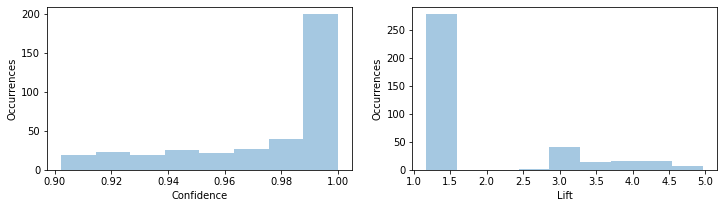

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(12, 3))
ax1 = sns.distplot(conf_list, kde=False, ax=axes[0])
ax1.set_xlabel("Confidence")
ax1.set_ylabel("Occurrences")

ax2 = sns.distplot(lift_list, kde=False, ax=axes[1])
ax2.set_xlabel("Lift")
ax2.set_ylabel("Occurrences")

In [ ]:
from operator import itemgetter
rules.sort(key=itemgetter(5), reverse=True)
print(len(rules))
rules

110


[('OC1',
  ('L5', 'T3'),
  488,
  0.0599287731794179,
  0.991869918699187,
  4.671368853653834),
 ('OC1',
  ('L5',),
  1495,
  0.1835932702935036,
  0.9676375404530745,
  4.557242621115897),
 ('OC1',
  ('T4', 'L5'),
  837,
  0.10278767039174751,
  0.9554794520547946,
  4.499982173558237),
 ('OC1',
  ('L5', 'HR3'),
  429,
  0.05268328625813582,
  0.9206008583690987,
  4.335715899190035),
 ('OC0',
  ('H2', 'T3', 'HR2', 'C1', 'L1'),
  488,
  0.0599287731794179,
  1.0,
  1.269566573121297),
 ('OC0',
  ('H2', 'T3', 'HR2', 'L1'),
  504,
  0.06189365098857915,
  1.0,
  1.269566573121297),
 ('OC0',
  ('H2', 'T3', 'C1', 'L1'),
  523,
  0.06422694338695813,
  1.0,
  1.269566573121297),
 ('OC0', ('H2', 'T3', 'L1'), 553, 0.06791108927913546, 1.0, 1.269566573121297),
 ('OC0',
  ('H2', 'HR2', 'C1', 'L1'),
  578,
  0.0709812108559499,
  1.0,
  1.269566573121297),
 ('OC0',
  ('H2', 'HR2', 'L1'),
  620,
  0.07613901510499815,
  1.0,
  1.269566573121297),
 ('OC0', ('H2', 'C1', 'L1'), 784, 0.096279012648